# Non-linear interactions

[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/danhtaihoang/network-inference/master?filepath=sphinx%2Fcodesource%2Fquadratic_notebook.ipynb)


When the interactions between variables contains not only linear terms but also
non-linear terms, quadratic for instance, the local field can be written as
$$H_i(t) = \sum_j W_{ij} \sigma_j (t) + \frac{1}{2} \sum_{j,k} Q_{ijk} \sigma_{j}(t) \sigma_{k}(t)$$

The algorithm for inferring couplings $W_{ij}$ and $Q_{ijk}$ is similar to the algorithm for inferring only $W_{ij}$ as described in the Method section. The updated values of couplings are computed as
$$Q_{ijk} = \sum_{\mu, \nu} \langle \delta E_i \delta \sigma_{\mu} \sigma_{\nu} \rangle[C^{-1}]_{j\mu}[C^{-1}]_{k\nu}
- \sum_{l} \sum_{\lambda, \mu, \nu} \langle \delta E_i \delta \sigma_l \rangle \langle \delta \sigma_\lambda \delta \sigma_\mu \sigma_\nu \rangle [C^{-1}]_{j\lambda} [C^{-1}]_{k\mu} [C^{-1}]_{l\nu}$$

and
$$W_{ij} = \sum_{k} \lbrace \langle \delta E_i \delta \sigma_k \rangle [C^{-1}]_{kj} - Q_{ijk}\langle \sigma_k \rangle \rbrace$$

In the following, we will demonstrate the performance of our method in inferring the linear couplings $W_{ij}$ and quadratic couplings $Q_{ijk}$ from configurations of variables $\vec \sigma$.

As usual, we start by importing the nesscesary packages into the jupyter notebook.

In [1]:
import numpy as np
import sys
import timeit
import matplotlib.pyplot as plt
import quadratic as quad
%matplotlib inline

np.random.seed(1)

Let us consider a system of `n` variables. The coupling variability is determined by parameter `g`.

In [2]:
# parameter setting:
n = 20  
g = 1.0

From the parameters, we generate linear couplings $w_{ij}$ and quadratic couplings $q_{ijk}$. These are the couplings that our inference algorithms has to reproduce.

In [3]:
w0 = np.random.normal(0.0,g/np.sqrt(n),size=(n,n))
q0 = quad.generate_quadratic(g,n)

Now, from these couplings, we will generate configurations of variables `s` according to the kinetic Ising model.

In [4]:
l = 5000
s = quad.generate_data(w0,q0,l)

Using the configurations, we will recover the couplings.

In [5]:
w,q = quad.inference(s)

We plot the inferred couplings as function of the actual couplings. 

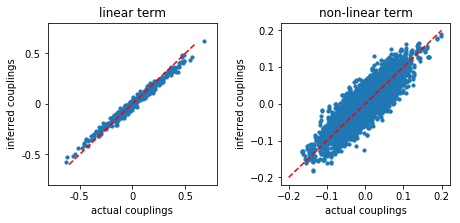

In [6]:
plt.figure(figsize=(6.5,3.2))

plt.subplot2grid((1,2),(0,0))
plt.title('linear term')
plt.plot([-0.6,0.6],[-0.6,0.6],'r--')
plt.scatter(w0,w,s=10)
plt.xlabel('actual couplings')
plt.ylabel('inferred couplings')
plt.xticks([-0.5,0,0.5],('-0.5','0','0.5'))
plt.yticks([-0.5,0,0.5],('-0.5','0','0.5'))
plt.xlim(-0.8,0.8)
plt.ylim(-0.8,0.8)

plt.subplot2grid((1,2),(0,1))
plt.title('non-linear term')
plt.plot([-0.2,0.2],[-0.2,0.2],'r--')
plt.scatter(q0,q,s=10)
plt.xlabel('actual couplings')
plt.ylabel('inferred couplings')

plt.tight_layout(h_pad=1, w_pad=1.5)
plt.show()